# Question

## 3 - Analisa Variabel Kontinu

1. Mana yang lebih mungkin:
    - Pemesanan yang dibatalkan memiliki ADR lebih dari 101,83
    - Pemesanan yang dibatalkan memiliki ADR lebih rendah dari 101,83

2. Mana yang lebih mungkin:
    - Pemesanan oleh keluarga (asumsi minimal 2 orang) memiliki lead time diatas 104 hari memesan dengan ADR diatas 101,83.
    - Pemesanan oleh keluarga (asumsi minimal 2 orang) memiliki lead time dibawah 104 hari memesan dengan ADR diatas 101,83.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style("darkgrid")

# Import Dataset

In [2]:
df = pd.read_csv('hotel_bookings.csv')

df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


# Analysis

## 1. Mana yang lebih mungkin:
  - Pemesanan yang dibatalkan memiliki ADR lebih dari 101,83
  - Pemesanan yang dibatalkan memiliki ADR lebih rendah dari 101,83

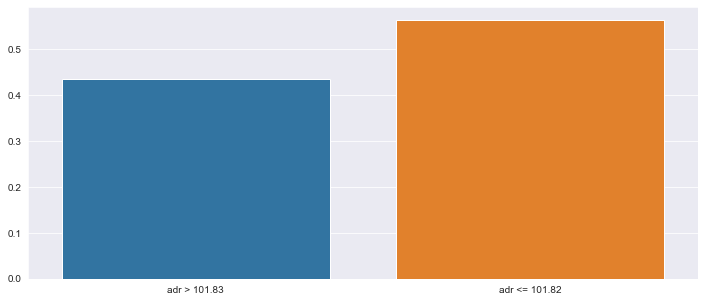

In [4]:
# filtering
all_cancel = df[df['is_canceled'] == 1]['is_canceled'].count()
cancel_upper = df[(df['is_canceled'] == 1) & (df['adr'] > 101.83)]['is_canceled'].count() / all_cancel
cancel_lower = df[(df['is_canceled'] == 1) & (df['adr'] <= 101.83)]['is_canceled'].count() / all_cancel

# barplot
plt.figure(figsize=(12,5))
sns.barplot(x=['adr > 101.83', 'adr <= 101.82'], y=[cancel_upper, cancel_lower])
plt.show()

Menunjukkan jika kemungkinan seseorang melakukan pembatalan pemesanan jika ADR nya kurang dari mean atau 101,82 sebesar 56,44%

## 2. Mana yang lebih mungkin:

- Pemesanan oleh keluarga (asumsi minimal 2 orang) memiliki lead time diatas 104 hari memesan dengan ADR diatas 101,83.
- Pemesanan oleh keluarga (asumsi minimal 2 orang) memiliki lead time dibawah 104 hari memesan dengan ADR diatas 101,83.

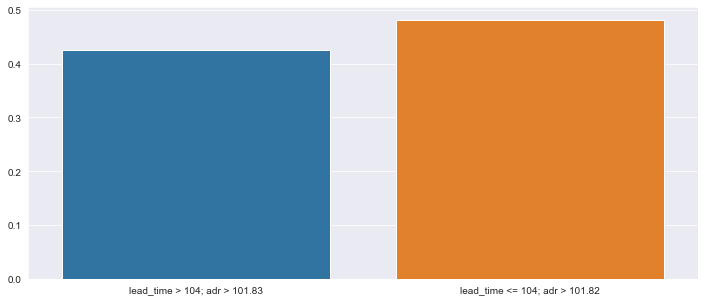

In [5]:
# filtering
df_fam = df[(df['adults'] + df['children'] >= 2)]

lead_upper = df_fam[df_fam['lead_time'] > 104]
lead_lower = df_fam[df_fam['lead_time'] <= 104]

lead_upper_adr_upper = lead_upper[lead_upper['adr']>101.83]
lead_lower_adr_lower = lead_lower[lead_lower['adr']>101.83]

p_up = lead_upper_adr_upper['is_canceled'].count() / lead_upper['is_canceled'].count()
p_low = lead_lower_adr_lower['is_canceled'].count() / lead_lower['is_canceled'].count()

# barplot
plt.figure(figsize=(12,5))
sns.barplot(x=['lead_time > 104; adr > 101.83', 'lead_time <= 104; adr > 101.82'], y=[p_up, p_low])
plt.show()

In [20]:
p_up

0.42600084386091186

In [21]:
p_low

0.48135785810666853

Masih lebih memungkinkan pemesanan oleh keluarga yang memesan dengan waktu selisih pemesanan dan kedatangan (lead_time) kurang dari 104 hari dengan ADR diatas 101,82 sebesar 48,14% dibandingkan dengan pemesanan oleh keluarga yang memesan dengan waktu selisih pemesanan dan kedatangan (lead_time) lebih 104 hari dengan ADR diatas 101,82 dengan probabilitas sebesar 42,60%